18.44
51.094


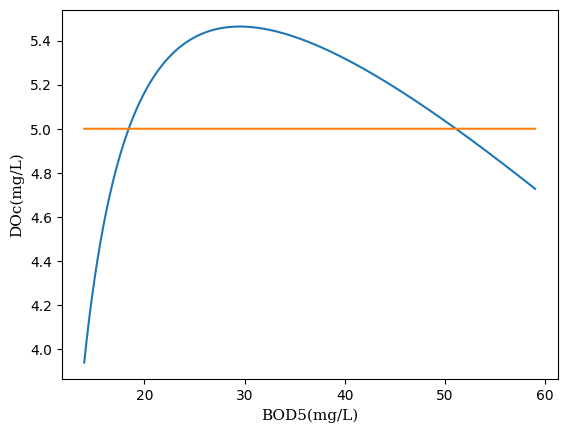

In [46]:
import numpy as np
import matplotlib.pyplot as plt

l = {}
ll = []
ld = []
l5 = []
for BOD5 in range(9000, 100000):
    l5.append(5)
    BOD5 /= 1000
    ll.append(BOD5)
    DOs = 10.15
    Qw = 1.2
    Qr = 10
    DOr = 6
    DOw = 1

    DO = (Qw * DOw + Qr * DOr) / (Qw + Qr)
    # print(DO)
    Da = DOs - DO
    # print(Da)

    v = 0.3
    h = 2.92
    k = 0.24
    teta1 = 1.135
    teta2 = 1.024
    k15 = k * teta1 ** (-5)

    kd = (k + (v * 0.1) / h) * teta1 ** (-5)
    # print(kd,"kd")
    kr = ((3.9 * v ** 0.5) / h ** 1.5) * teta2 ** (-5)
    # print(kr,"kr")
    Lw = BOD5 / (1 - np.exp(-5 * k15))
    # print(Lw)
    Lr = 7.5

    La = (Qw * Lw + Qr * Lr) / (Qw + Qr)

    tc = (1 / (kr - kd)) * np.log((kr / kd) * (1 - Da * ((kr - kd) / (kd * La))))
    # print(tc)

    DOOOOO = DOs - ((kd * La) / (kr - kd)) * (np.exp(-kd * tc) - np.exp(-kr * tc)) - Da * np.exp(-kr * tc)
    ld.append(DOOOOO)
    # print(DOOOOO)
    if abs(DOOOOO - 5) < 0.00001:
        l[abs(DOOOOO - 5)] = BOD5
        print(BOD5)
# print(l[min(l)])
p1 = plt.plot(ll[5000:50000], ld[5000:50000])
p2 = plt.plot(ll[5000:50000], l5[5000:50000])
font1 = {'family':'serif','size':11}
plt.xlabel("BOD5(mg/L)",fontdict=font1)
plt.ylabel("DOc(mg/L)", fontdict=font1)
plt.show()

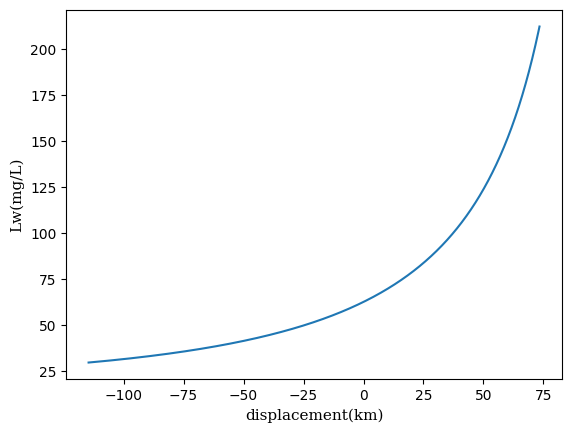

In [56]:
import numpy as np
import matplotlib.pyplot as plt

l = {}
ll = []
ld = []
l5 = []
for BOD5 in range(9000, 100000):
    BOD5 /= 1000
    DOs = 10.15
    Qw = 1.2
    Qr = 10
    DOr = 6
    DOw = 1

    DO = (Qw * DOw + Qr * DOr) / (Qw + Qr)
    # print(DO)
    Da = DOs - DO
    # print(Da)

    v = 0.3
    h = 2.92
    k = 0.24
    teta1 = 1.135
    teta2 = 1.024
    k15 = k * teta1 ** (-5)

    kd = (k + (v * 0.1) / h) * teta1 ** (-5)
    # print(kd,"kd")
    kr = ((3.9 * v ** 0.5) / h ** 1.5) * teta2 ** (-5)
    # print(kr,"kr")
    Lw = BOD5 / (1 - np.exp(-5 * k15))
    ll.append(Lw)
    # print(Lw)
    Lr = 7.5

    La = (Qw * Lw + Qr * Lr) / (Qw + Qr)

    tc = (1 / (kr - kd)) * np.log((kr / kd) * (1 - Da * ((kr - kd) / (kd * La))))
    displacement = tc * v * 86400 / 1000
    ld.append(displacement)
    # print(tc)

    # DOOOOO = DOs - ((kd * La) / (kr - kd)) * (np.exp(-kd * tc) - np.exp(-kr * tc)) - Da * np.exp(-kr * tc)
    # ld.append(DOOOOO)
    # # print(DOOOOO)
    # if abs(DOOOOO - 5) < 0.00001:
    #     l[abs(DOOOOO - 5)] = BOD5
    #     print(BOD5)
# print(l[min(l)])
p1 = plt.plot(ld[5000:], ll[5000:])
# p2 = plt.plot(ll[5000:50000], l5[5000:50000])
font1 = {'family':'serif','size':11}
plt.xlabel("displacement(km)",fontdict=font1)
plt.ylabel("Lw(mg/L)", fontdict=font1)
plt.show()